In [87]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
import matplotlib.pyplot as plt
import matplotlib.image as img
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np

# Structure de bande électronique du RbDyO2

In [88]:
with MPRester("SsRPm7BKULyAwhtl") as m:

    bandstructure = m.get_bandstructure_by_material_id("mp-7476")

{'direct': False, 'energy': 3.6020000000000003, 'transition': '\\Gamma-F'}


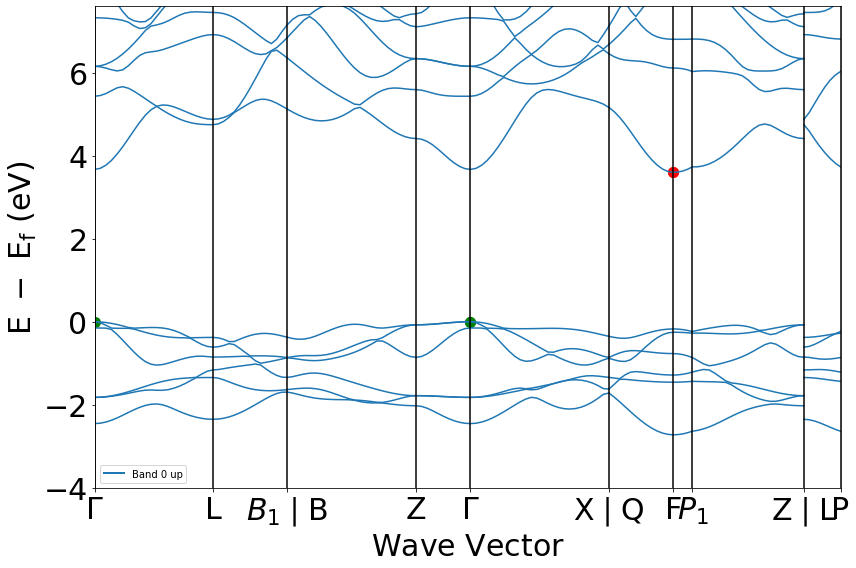

In [89]:
plot = BSPlotter(bandstructure)
plot.get_plot(vbm_cbm_marker=True)
bandGap = bandstructure.get_band_gap()
print(bandGap)

# Analyse de la bande interdite

In [90]:
print(bandstructure.get_band_gap())

{'direct': False, 'energy': 3.6020000000000003, 'transition': '\\Gamma-F'}


La bande interdite a une énergie de 3.602 eV, ce qui implique que le cristal a un comportement isolant d'un point de vue électrique. 
La bande interdite est indirecte. De plus, le vecteur d'onde évolue selon une direction $\Gamma-F$ dans la bande interdite. On peut donc conclure que le minimum de la bande de conduction et le maximum de la bande de valence correspondent à des vecteurs d'onde différents.

# Analyse de la dernière bande de valence

In [91]:
print(bandstructure.get_vbm().get('band_index'))
print('VBM energy :', bandstructure.get_vbm().get('energy'))

defaultdict(<class 'list'>, {<Spin.up: 1>: [13, 14]})
VBM energy : 1.2797


La maximum de la bande de valence a une énergie de 1.2797 eV. Les bandes 13 et 14 sont celles qui contiennent le maximum de la bande de valence. La bande 14 est donc la dernière bande de valence.

# Analyse de la première bande de conduction

In [92]:
print(bandstructure.get_cbm().get('band_index'))
print('CBM energy :', bandstructure.get_cbm().get('energy'))

defaultdict(<class 'list'>, {<Spin.up: 1>: [15]})
CBM energy : 4.8817


Le minimum de la bande de conduction a une énergie de 4.8817 eV. La bande 15 est celle qui contient le minimum de la bande de conduction. La bande 15 est donc la première bande de conduction.

# Analyse de la dispersion : direction dans laquelle la dernière bande de valence et la première bande de conduction présentent le plus et le moins de dispersion

In [93]:
Elem = plot.bs_plot_data()
EE = Elem.get('energy')
positions = Elem.get('distances')
dist = Elem.get('ticks').get('distance')
Dist = np.array([dist[0],dist[1],dist[3],dist[5],dist[7],dist[9],dist[11],dist[13],dist[14]])

In [94]:
dx = np.zeros(8)
dycond = np.zeros(8)
dyval = np.zeros(8)
mcond = np.zeros(8)
mval = np.zeros(8)

for i in range(8):
    dx[i] = Dist[i+1] - Dist[i]
    
for i in range(8):
    dyval[i] =EE.get('1')[i][14][-1] - EE.get('1')[i][14][0]
    dycond[i] =EE.get('1')[i][15][-1] - EE.get('1')[i][15][0]
    
for i in range (8):
    mcond[i] = dycond[i]/dx[i]
    mval[i] = dyval[i]/dx[i]

maxVal = np.max(abs(mval))
minVal = np.min(abs(mval))
maxCond = np.max(abs(mcond))
minCond = np.min(abs(mcond))
print('Pour la dernière bande de valence : \n')
print('La plus grande dispersion vaut :', maxVal, "\n")
print('La plus faible dispersion vaut :', minVal, "\n")
print('Pour la première bande de conduction : \n')
print('La plus grande dispersion vaut :', maxCond, "\n")
print('La plus faible dispersion vaut :', minCond, "\n")

Pour la dernière bande de valence : 

La plus grande dispersion vaut : 1.0688963024186826 

La plus faible dispersion vaut : 0.0061241359149292835 

Pour la première bande de conduction : 

La plus grande dispersion vaut : 9.37035817380815 

La plus faible dispersion vaut : 0.13351765419495318 



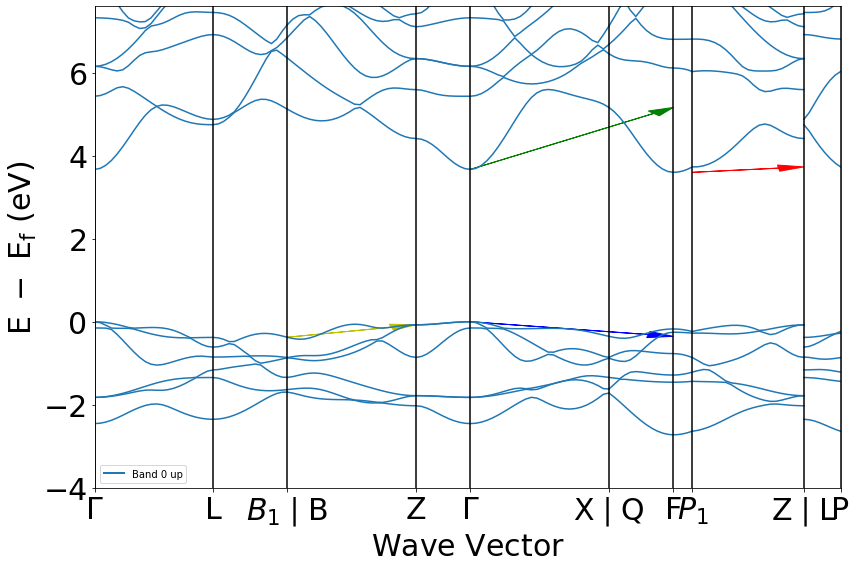

In [95]:
plot.get_plot()
plt.arrow(Dist[4], (EE.get('1')[4][14])[0], dx[4], dyval[4], color = 'b', head_width = 0.15,length_includes_head=True)
plt.arrow(Dist[2], (EE.get('1')[2][14])[0], dx[2], dyval[2], color = 'y', head_width = 0.15,length_includes_head=True)
plt.arrow(Dist[6], (EE.get('1')[6][15])[0], dx[6], dycond[6], color = 'r', head_width = 0.15,length_includes_head=True)
plt.arrow(Dist[4], (EE.get('1')[4][15])[0], dx[4], dycond[4], color = 'g', head_width = 0.15,length_includes_head=True)

plt.show()

# Calcul de la masse effective au sommet de la dernière bande de valence et à la base de la première bande de conduction

In [96]:
#Calcul des masses effective 
h = 6.58212e-16 #Constante de Planck

# Masse effective pour le maximum de la bande de valence
vbm =  bandstructure.get_vbm()
ev = vbm['energy']
kv = vbm['kpoint'].cart_coords

mv = (h**2)/(2*ev)*(kv[0]**2+kv[1]**2+kv[2]**2)

print("La masse effective au sommet de la dernière bande de valence en supposant une dispersion parabolique vaut :", mv, '[kg]')

# Masse effective pour le minimum de la bande de conduction
cbm =  bandstructure.get_cbm()
ec = cbm['energy']
kc = cbm['kpoint'].cart_coords

mc = (h**2)/(2*ec)*(kc[0]**2+kc[1]**2+kc[2]**2)

print("La masse effective à la base de la première bande de conduction en supposant une dispersion parabolique vaut :", mc, '[kg]')

La masse effective au sommet de la dernière bande de valence en supposant une dispersion parabolique vaut : 0.0 [kg]
La masse effective à la base de la première bande de conduction en supposant une dispersion parabolique vaut : 5.184145078725443e-32 [kg]
